<a href="https://colab.research.google.com/github/yuta-kanematsu/TU_math_study/blob/main/Chap08_Cm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

'%.3f'

In [9]:
# インポート
import requests, zipfile
import io

# 自動車価格データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content

# 取得したデータをDataFrameオブジェクトとして読み込み
auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# データの列にラベルを設定
auto.columns =['symboling','normalized-losses','make','fuel-type' ,'aspiration','num-of-doors',
                            'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
                            'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
                            'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
#Ex08-01
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

auto.head()

auto = auto[['price', 'length', 'engine-size']]
auto = auto.replace('?', np.nan).dropna()

X = auto.drop('price', axis=1)
Y = auto['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

model = LinearRegression()
model.fit(X_train, Y_train)

print('決定係数(train):{:.3f}'.format(model.score(X_train,Y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,Y_test)))

決定係数(train):0.771
決定係数(test):0.763


In [10]:
#Ex08-02
auto = auto[['price', 'bore', 'stroke']]
auto = auto.replace('?', np.nan).dropna()

X = auto.drop('price', axis=1)
Y = auto['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

model = LinearRegression()
model.fit(X_train, Y_train)

print('決定係数(train):{:.3f}'.format(model.score(X_train,Y_train)))
print('決定係数(test):{:.3f}'.format(model.score(X_test,Y_test)))

決定係数(train):0.359
決定係数(test):0.194


In [24]:
#Ex08-03
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=0)

model = LogisticRegression()
model.fit(X_train,Y_train)
print('正解率(train):{:.3f}'.format(model.score(X_train, Y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, Y_test)))

正解率(train):0.958
正解率(test):0.923


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [25]:
#Ex08-04
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = LogisticRegression()
model.fit(X_train_std, Y_train)
print('正解率(train):{:.3f}'.format(model.score(X_train_std, Y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, Y_test)))

正解率(train):0.991
正解率(test):0.958


In [26]:
#Ex08-05
from sklearn.linear_model import LinearRegression, Lasso

x = auto.drop('price', axis=1)
y = auto['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

models = {
    'linear': LinearRegression(),
    'lasso1': Lasso(alpha=1.0, random_state=0),
    'lasso2':  Lasso(alpha=200.0, random_state=0)    
}

scores={}
for model_name, model in models.items():
  model.fit(x_train, y_train)
  scores[(model_name, 'train')] = model.score(x_train, y_train)
  scores[(model_name, 'test')] = model.score(x_test, y_test)

pd.Series(scores).unstack()

,test,train
lasso1,0.194512,0.359268
lasso2,0.230670,0.350092
linear,0.194100,0.359269


In [27]:
#Ex08-06
from sklearn.tree import  DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=66)

models = {
    'tree1': DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=0),
    'tree2': DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0),
    'tree3': DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0),
    'tree4': DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0),
    'tree5': DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0),
    'tree6': DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train,y_train)
    scores[(model_name, 'train')] = model.score(X_train, y_train)
    scores[(model_name, 'test')] = model.score(X_test, y_test)

pd.Series(scores).unstack()


,test,train
tree1,0.930070,0.971831
tree2,0.902098,0.997653
tree3,0.902098,1.000000
tree4,0.923077,0.974178
tree5,0.895105,1.000000
tree6,0.895105,1.000000


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


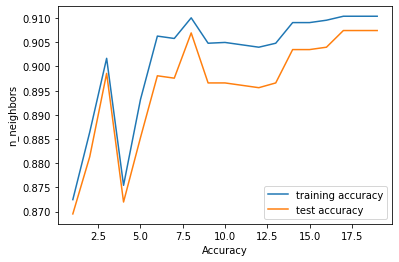

In [28]:
#Ex08-07
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

mush = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)
mush.columns =[
    'classes','cap_shape','cap_surface','cap_color','odor','bruises',
    'gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape',
    'stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
    'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
    'ring_number','ring_type','spore_print_color','population','habitat'
]

mush_dummy = pd.get_dummies(mush[['gill_color', 'gill_attachment', 'odor', 'cap_color']])
mush_dummy['flg'] = mush['classes'].map(lambda x: 1 if x == 'p' else 0)

from sklearn.neighbors import KNeighborsClassifier

x = mush_dummy.drop('flg', axis=1)
y = mush_dummy['flg']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=50)

training_accuracy = []
test_accuracy = []
neighbors_setting = range(1,20)
for n_neighbors in neighbors_setting:
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(x_train, y_train)
  training_accuracy.append(clf.score(x_train, y_train))
  test_accuracy.append(clf.score(x_test, y_test))

plt.plot(neighbors_setting, training_accuracy, label='training accuracy')
plt.plot(neighbors_setting, test_accuracy, label='test accuracy')
plt.xlabel('Accuracy')
plt.ylabel('n_neighbors')
plt.legend()

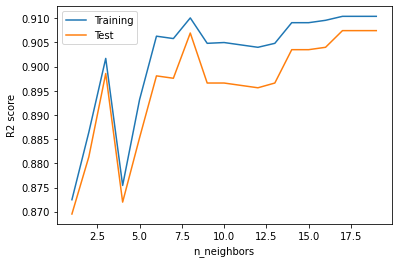

In [31]:
#Ex08-08
student = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ds_samplefiles/student-mat.csv', sep=';')
X = student.loc[:, 
    ['age','Medu','Fedu','traveltime','studytime',
     'failures','famrel','freetime','goout','Dalc','Walc',
     'absences','G1','G2']].values

from sklearn.neighbors import  KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, student.G3, random_state=0)

scores_train = []
scores_test =[]
neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    scores_train.append(model.score(X_train, y_train))
    scores_test.append(model.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy,label='Training')
plt.plot(neighbors_settings, test_accuracy,label='Test')
plt.ylabel('R2 score')
plt.xlabel('n_neighbors')
plt.legend()

In [32]:
#Ex08-09
from sklearn.svm import SVC

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=50)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

model = SVC(kernel='rbf', random_state=0, C=2)
model.fit(X_train_std,y_train)
print('正解率(train):{:.3f}'.format(model.score(X_train_std, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test_std, y_test)))

正解率(train):0.988
正解率(test):0.986


Cm09-01

回帰：連続するデータ予測に使う(主に数字)

分類：与えられたクラスに分ける

教師あり学習：学習データに正解を与えた状態で学習させる手法

ロジスティック回帰分析：いくつかの説明関数から2値の結果(目的変数)が起きる確率を説明・予測する

正則化：モデルの複雑化を防ぐために情報を追加する手法

リッジ回帰：過学習を防ぐため線形回帰に正則化項としてL2ノルムを導入したもの

ラッソ回帰：最小二乗コスト関数に対して重みの合計を足した物

決定木：意志決定や分類、判別、予測などのために作られる木構造のデータや図のこと

エントロピー：確率変数Xのとる値の乱雑さの尺度を表す値

情報利得:データ分割の前後でどれだけきれいに分割できたかを数値化した物

k-NN法：回帰や分類を行う際に似たようなデータをｋ個集めてそれらの多数決から目的とする値を決める手法

SVM:2クラス分類の線形識別関数を構築する機械学習モデルの一種

ノーフリーランチ：コスト関数の極値の計算を行ういずれのアルゴリズムも、考えられるすべてのコスト関数の極値を計算させた性能の平均値をとるとどれも同じ性能であるという定理